In [1]:
# 1. 사용할 모듈 불러오기
from keras import layers, models;

noIn = 784
noHL = 100
noClass = 10
noOut = noClass

Using TensorFlow backend.


In [2]:
# 2. 학습모델 구성하기
model = models.Sequential()
model.add(layers.Dense(noHL, activation = 'relu', input_shape=(noIn, )))
model.add(layers.Dense(noOut, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


W0704 12:28:46.776403 139832489486208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 12:28:46.809389 139832489486208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 12:28:46.813007 139832489486208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 12:28:46.848463 139832489486208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0704 12:28:46.875444 139832489486208 deprecation_wrappe

In [3]:
# 중간에 module을 불러와도 됩니다.
import numpy as np
from keras import datasets #mnist
from keras.utils import np_utils #to_categorical

# 3. 데이터 불러오기
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train.shape, y_train.shape, X_test.shape,y_test.shape,

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
Y_train = np_utils.to_categorical(y_train)

Y_train.shape

(60000, 10)

In [0]:
Y_test = np_utils.to_categorical(y_test)


In [0]:
L, W, H = X_train.shape

X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)

In [7]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
X_train  = X_train / 255
X_test = X_test / 255

# 4. Training 하기

In [9]:
history = model.fit(X_train, Y_train, epochs = 15, batch_size = 100, validation_split=0.2)
performance_test = model.evaluate(X_test, Y_test, batch_size = 100)
                                 
print('Model Test Loss and Accuracy -> ', performance_test)

W0704 12:28:48.200160 139832489486208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0704 12:28:48.261945 139832489486208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 57us/step - loss: 0.4017 - acc: 0.8886 - val_loss: 0.2243 - val_acc: 0.9378
Epoch 2/15
48000/48000 [==============================] - 2s 51us/step - loss: 0.1918 - acc: 0.9459 - val_loss: 0.1641 - val_acc: 0.9542
Epoch 3/15
48000/48000 [==============================] - 2s 51us/step - loss: 0.1388 - acc: 0.9602 - val_loss: 0.1321 - val_acc: 0.9617
Epoch 4/15
48000/48000 [==============================] - 2s 51us/step - loss: 0.1092 - acc: 0.9689 - val_loss: 0.1174 - val_acc: 0.9658
Epoch 5/15
48000/48000 [==============================] - 2s 51us/step - loss: 0.0880 - acc: 0.9747 - val_loss: 0.1039 - val_acc: 0.9693
Epoch 6/15
48000/48000 [==============================] - 2s 51us/step - loss: 0.0730 - acc: 0.9788 - val_loss: 0.0987 - val_acc: 0.9716
Epoch 7/15
48000/48000 [==============================] - 3s 52us/step - loss: 0.0612 - acc: 0.9828 - val_loss: 0.0939 - val_acc

In [0]:
import matplotlib.pyplot as plt

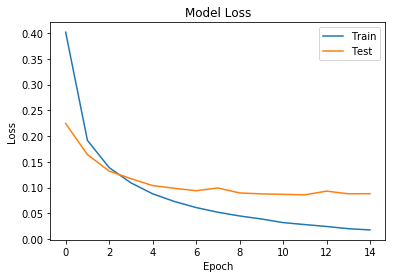

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc=0)
plt.show()

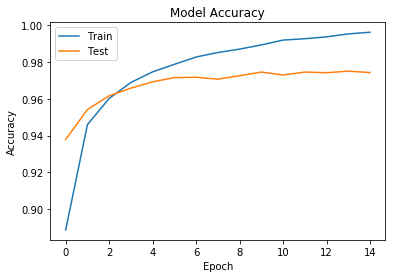

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc=0)
plt.show()

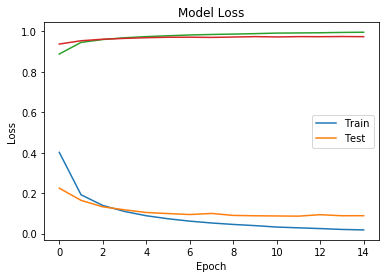

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc=0)
plt.legend(['Train', 'Test'], loc=0)

plt.show()

<Figure size 144000x15552 with 0 Axes>

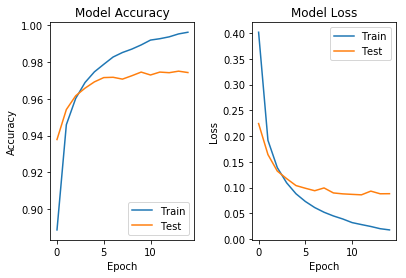

In [14]:
plt.figure(figsize=(2000,216))
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(left=0.1, wspace = 0.4)
ax1 = axs[0]
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.legend(['Train', 'Test'], loc=0)

ax2 = axs[1]
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.legend(['Train', 'Test'], loc=0)
fig.align_xlabels(axs[:])

plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothicEcoBold'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


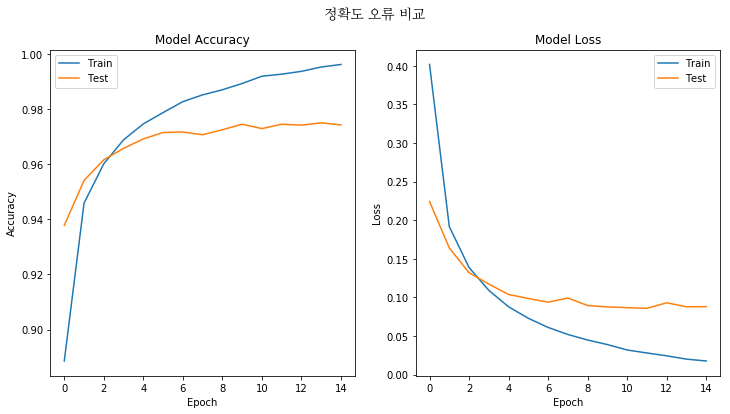

In [22]:
import matplotlib

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = matplotlib.font_manager.FontProperties(fname=path, size=14)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc=0)

plt.subplot(122)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc=0)
plt.suptitle("정확도 오류 비교",fontproperties=fontprop)
plt.show()

In [16]:
matplotlib.font_manager.findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/libera

In [0]:
matplotlib.rcParams['font.family'] = ['NanumGothicEcoBold']

In [18]:
matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf")

In [19]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.2 LTS
Release:	18.04
Codename:	bionic


In [20]:
!sudo apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 16 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-

In [21]:
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
